<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Xander Gallegos, Sergio Daniel Dueñas.

**Fecha:** 12 de marzo de 2024.

**Expediente** : 737989, XXXXXX.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: <https://github.com/xagallegos/ProyectoConjunto_T5_XGallegos_SDDuenas>

# Tarea 5: Clase 13

## Enunciado de tarea 
> Implementar todas las técnicas vistas en esta clase al siguiente dataset para predecir el precio de las viviendas:
<https://www.kaggle.com/datasets/yasserh/housing-prices-dataset>

Código de solución estudiante 1

In [1]:
import numpy as np
import pandas as pd
from keras import layers
from keras.models import Sequential, Model
import matplotlib.pyplot as plt

In [2]:
target_col = 'price'

data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


### 1. Modelo CNN univariado

In [3]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [4]:
n_steps = 3

# Dividir en muestras
X, y = split_univariate_sequence(data[target_col], n_steps)

In [5]:
X = X.reshape((X.shape[0], X.shape[1], 1))

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 1)
y: (542,)


In [6]:
model_1 = Sequential([
    layers.Input(shape=(n_steps,1)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, 'relu'),
    layers.Dense(1)
])

model_1.compile(optimizer='adam', loss='mse')
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             192       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 50)                3250      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,493
Trainable params: 3,493
Non-trainable params: 0
______________________________________________________

In [7]:
history_1 = model_1.fit(X, y, epochs=100, verbose=False)

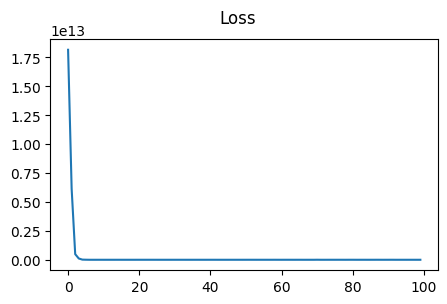

In [8]:
plt.figure(figsize=(5,3))

plt.plot(history_1.history['loss'])
plt.suptitle('Loss')

plt.show()

### 2. Modelos CNN multivariados

#### 2.1 Series de entradas múltiples

In [9]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence(sequence: np.ndarray, n_steps: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix - 1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [10]:
numeric_data = data.select_dtypes(include='number')

# Reorder columns
cols = [c for c in numeric_data.columns if c != target_col]
cols += [target_col]
numeric_data = numeric_data[cols]

In [11]:
X, y = split_multivariate_sequence(numeric_data.to_numpy(), n_steps)
n_features = X.shape[2]

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (543, 3, 5)
y: (543,)


In [12]:
model_2 = Sequential([
    layers.Input(shape=(n_steps, n_features)),
    layers.convolutional.Conv1D(64, 2,  activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, 'relu'),
    layers.Dense(1)
    
])

model_2.compile(optimizer='adam', loss='mse')
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 2, 64)             704       
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                3250      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 4,005
Trainable params: 4,005
Non-trainable params: 0
____________________________________________________

In [13]:
history_2 = model_2.fit(X, y, epochs=100, verbose=False)

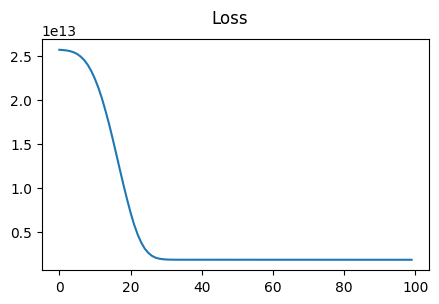

In [14]:
plt.figure(figsize=(5,3))

plt.plot(history_2.history['loss'])
plt.suptitle('Loss')

plt.show()

**Modelo con múltiples encabezamientos**

In [15]:
def create_submodel(steps, features):
    visible = layers.Input((steps, features))
    cnn = layers.convolutional.Conv1D(64, 2, activation='relu')(visible)
    cnn = layers.convolutional.MaxPooling1D()(cnn)
    cnn = layers.Flatten()(cnn)
    return visible, cnn

In [16]:
n_features = 1
submodels = [create_submodel(steps=n_steps, features=n_features) for x in range(X.shape[-1])]
inputs = [x[0] for x in submodels]
cnns = [x[1] for x in submodels]

merge = layers.merging.concatenate(cnns)
dense = layers.Dense(50, activation='relu')(merge)
output = layers.Dense(1)(dense)

In [17]:
model_3 = Model(inputs=[inputs], outputs=[output])
model_3.compile(optimizer='adam', loss='mse')
model_3.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 3, 1)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 3, 1)]       0           []                               
                                                                                                  
 input_5 (InputLayer)           [(None, 3, 1)]       0           []                               
                                                                                                  
 input_6 (InputLayer)           [(None, 3, 1)]       0           []                               
                                                                                              

In [18]:
# Separar entradas
X1 = X[:, :, 0].reshape(X.shape[0], X.shape[1], n_features)
X2 = X[:, :, 1].reshape(X.shape[0], X.shape[1], n_features)
X3 = X[:, :, 2].reshape(X.shape[0], X.shape[1], n_features)
X4 = X[:, :, 3].reshape(X.shape[0], X.shape[1], n_features)
X5 = X[:, :, 4].reshape(X.shape[0], X.shape[1], n_features)

print(X1.shape)

(543, 3, 1)


In [19]:
history_3 = model_3.fit([X1, X2, X3, X4, X5], y, epochs=100, verbose=0)

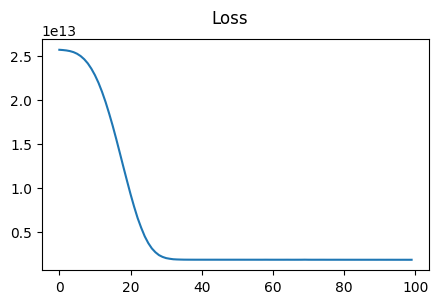

In [20]:
plt.figure(figsize=(5,3))

plt.plot(history_3.history['loss'])
plt.suptitle('Loss')

plt.show()

#### 2.2 Múltiples series paralelas

In [21]:
# dividir una secuencia multivariada en muestras para predicción múltiple
def split_multiple_forecasting_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps
        
        # comprobar si estamos más allá de la secuencia
        if end_ix > len(sequence)-1:
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [22]:
X, y = split_multiple_forecasting_sequence(numeric_data.to_numpy(), n_steps)

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 6)
y: (542, 6)


In [23]:
n_features = X.shape[2]

model_4 = Sequential([
    layers.Input(shape=(n_steps, n_features)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_features)
])

model_4.compile(optimizer='adam', loss='mse')

model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_7 (Conv1D)           (None, 2, 64)             832       
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_7 (Flatten)         (None, 64)                0         
                                                                 
 dense_6 (Dense)             (None, 50)                3250      
                                                                 
 dense_7 (Dense)             (None, 6)                 306       
                                                                 
Total params: 4,388
Trainable params: 4,388
Non-trainable params: 0
____________________________________________________

In [24]:
history_4 = model_4.fit(X, y, epochs=100, verbose=0)

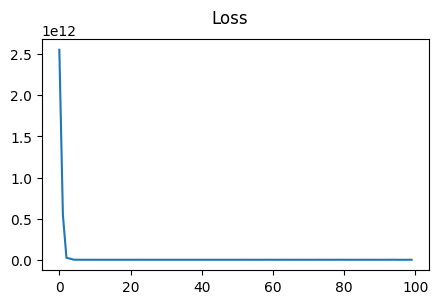

In [25]:
plt.figure(figsize=(5,3))

plt.plot(history_4.history['loss'])
plt.suptitle('Loss')

plt.show()

**Modelo CNN con múltiples salidas**

In [26]:
visible = layers.Input(shape=(n_steps, n_features))
cnn = layers.convolutional.Conv1D(64, 2, activation='relu')(visible)
cnn = layers.convolutional.MaxPooling1D()(cnn)
cnn = layers.Flatten()(cnn)
cnn = layers.Dense(50, activation='relu')(cnn)

In [27]:
outputs = [layers.Dense(1, name=f'output_{i+1}')(cnn) for i in range(X.shape[-1])]

model_5 = Model(inputs=visible, outputs=outputs)
model_5.compile(optimizer='adam', loss='mse')

model_5.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 3, 6)]       0           []                               
                                                                                                  
 conv1d_8 (Conv1D)              (None, 2, 64)        832         ['input_9[0][0]']                
                                                                                                  
 max_pooling1d_8 (MaxPooling1D)  (None, 1, 64)       0           ['conv1d_8[0][0]']               
                                                                                                  
 flatten_8 (Flatten)            (None, 64)           0           ['max_pooling1d_8[0][0]']        
                                                                                            

In [28]:
history_5 = model_5.fit(X, y.reshape((-1,1,6)), epochs=150, verbose=0)

<Figure size 500x300 with 0 Axes>

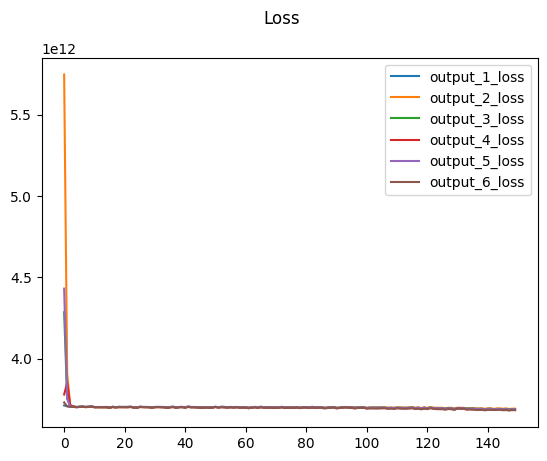

In [29]:
plt.figure(figsize=(5,3))

pd.DataFrame(history_5.history).drop(columns=['loss']).plot()
plt.suptitle('Loss')

plt.legend()
plt.show()

### 3. Modelos CNN de pasos múltiples

#### 3.1 Serie temporal univariada

In [30]:
# dividir una secuencia univariada en muestras
def split_univariate_sequence_m_step(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [31]:
n_features = 1
n_steps_in, n_steps_out = 3, 2

X, y = split_univariate_sequence_m_step(data[target_col], n_steps_in, n_steps_out)
X = X.reshape((X.shape[0], X.shape[1], n_features))

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (541, 3, 1)
y: (541, 2)


In [32]:
model_6 = Sequential([
    layers.Input(shape=(n_steps_in, n_features)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_steps_out)
])

model_6.compile(optimizer='adam', loss='mse')

model_6.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 2, 64)             192       
                                                                 
 max_pooling1d_9 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_9 (Flatten)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 50)                3250      
                                                                 
 dense_10 (Dense)            (None, 2)                 102       
                                                                 
Total params: 3,544
Trainable params: 3,544
Non-trainable params: 0
____________________________________________________

In [33]:
history_6 = model_6.fit(X, y, epochs=100, verbose=0)

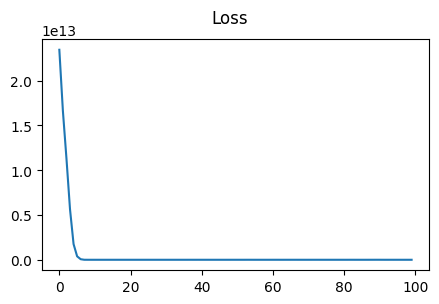

In [34]:
plt.figure(figsize=(5,3))

plt.plot(history_6.history['loss'])
plt.suptitle('Loss')

plt.show()

#### 3.2 Serie temporal multivariada

In [35]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out - 1
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :-1], sequence[end_ix-1:out_end_ix, -1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [36]:
X, y = split_multivariate_sequence_m_step(numeric_data.to_numpy(), n_steps_in, n_steps_out)

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (542, 3, 5)
y: (542, 2)


In [40]:
n_features = X.shape[2]

# Definir el modelo 
model_7 = Sequential([
    layers.Input(shape=(n_steps_in, n_features)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_steps_out)
])

model_7.compile(optimizer='adam', loss='mse')

model_7.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_11 (Conv1D)          (None, 2, 64)             704       
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 1, 64)            0         
 g1D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 50)                3250      
                                                                 
 dense_14 (Dense)            (None, 2)                 102       
                                                                 
Total params: 4,056
Trainable params: 4,056
Non-trainable params: 0
____________________________________________________

In [41]:
history_7 = model_7.fit(X, y, epochs=100, verbose=0)

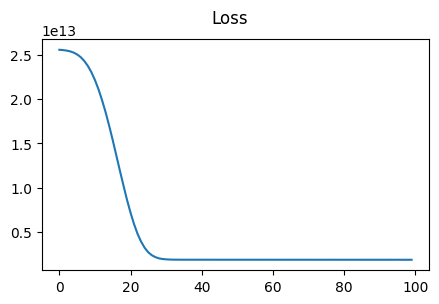

In [42]:
plt.figure(figsize=(5,3))

plt.plot(history_7.history['loss'])
plt.suptitle('Loss')

plt.show()

#### 3.3 Serie temporal multivariada predicción múltiple de cada entrada

In [43]:
# dividir una secuencia multivariada en muestras
def split_multivariate_sequence_m_step_parallel(sequence: np.ndarray, n_steps_in: int, n_steps_out: int):
    X, y = list(), list()
    for i in range(len(sequence)):
        # encontrar el final de este patrón
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        
        # comprobar si estamos más allá de la secuencia
        if out_end_ix > len(sequence):
            break
        # reunir partes de entrada y salida del patrón
        seq_x, seq_y = sequence[i:end_ix, :], sequence[end_ix:out_end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [44]:
X, y = split_multivariate_sequence_m_step_parallel(numeric_data.to_numpy(), n_steps_in, n_steps_out)

n_output = y.shape[1] * y.shape[2]
y = y.reshape((y.shape[0], n_output))

print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (541, 3, 6)
y: (541, 12)


In [45]:
n_features = X.shape[2]

model_8 = Sequential([
    layers.Input(shape=(n_steps_in, n_features)),
    layers.convolutional.Conv1D(64, 2, activation='relu'),
    layers.convolutional.MaxPooling1D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(n_output)
])

model_8.compile(optimizer='adam', loss='mse')

In [46]:
history_8 = model_8.fit(X, y, epochs=100, verbose=0)

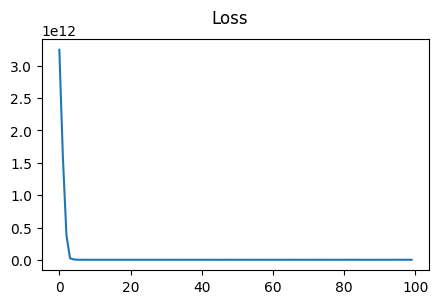

In [47]:
plt.figure(figsize=(5,3))

plt.plot(history_8.history['loss'])
plt.suptitle('Loss')

plt.show()

Código de solución estudiante 2

In [ ]:
# Código de solución estudiante 2
.
.
.
.
